In [1]:
import torch
x = torch.rand(2, 2)
print(x)
y = torch.rand(2, 2)
print(y)
y.add_(x)
print(y)


tensor([[0.4158, 0.6673],
        [0.8801, 0.0314]])
tensor([[0.5434, 0.6437],
        [0.4352, 0.8459]])
tensor([[0.9592, 1.3110],
        [1.3153, 0.8773]])


The item() is only available when tensor has one element.

In [2]:
print(y[0,0].item())

0.9591872096061707


In [8]:
a,b=4,4
x = torch.rand(a,b)
print(x,x.size())
y=x.view(1,16)
print(y,y.size())




tensor([[0.7501, 0.6308, 0.1928, 0.6969],
        [0.6851, 0.3781, 0.6394, 0.6597],
        [0.4858, 0.6606, 0.5606, 0.2121],
        [0.4153, 0.7170, 0.6659, 0.8289]]) torch.Size([4, 4])
tensor([[0.7501, 0.6308, 0.1928, 0.6969, 0.6851, 0.3781, 0.6394, 0.6597, 0.4858,
         0.6606, 0.5606, 0.2121, 0.4153, 0.7170, 0.6659, 0.8289]]) torch.Size([1, 16])


When one of the values is -1, pytorch will automatically covert -1 to the value that make the product fit to the amount of the elements.

In [10]:
print(x.view(-1,2),x.view(-1,2).size())

tensor([[0.7501, 0.6308],
        [0.1928, 0.6969],
        [0.6851, 0.3781],
        [0.6394, 0.6597],
        [0.4858, 0.6606],
        [0.5606, 0.2121],
        [0.4153, 0.7170],
        [0.6659, 0.8289]]) torch.Size([8, 2])


# converting between tensor and numpy.array

form tensor to numpy.array

In [11]:
import numpy as np

In [12]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


Remember if tenseor is save in the CPU instead of the GPU, then a & b will all be saved in the same memory location, that means if one is changed, the other one will change, too. 

In [13]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


form numpy.array to tensor 

In [17]:
a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)

a+=1
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


you can use following code to check if your cuda is available, and switching from CPU to GPU.

But notice! when you're trying to turn z to a numpy.array, you will get Error because numpy is only available on CPU

In [24]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    x=torch.ones(5, device = device)
    y=torch.ones(5)
    y=y.to(device)
    z=x+y
    z.numpy()
    
    

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

So we need to move z back to CPU 

In [26]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    x=torch.ones(5, device = device)
    y=torch.ones(5)
    y=y.to(device)
    z=x+y
    z = z.to("cpu")
    z.numpy()

print(z)

tensor([2., 2., 2., 2., 2.])


Whenever you has a variable in your model that you want to optimize, then you need the gredient so you need to specify requires_grad=True(default is False). 

In [47]:
x = torch.ones(5,requires_grad=True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


# Gradient calculation

In [48]:
x = torch.rand(3,requires_grad=True)
print(x)

tensor([0.3915, 0.8660, 0.3459], requires_grad=True)


Pytorch will generate a backpropagation which is called "AddBackward"

In [49]:
y=x+2
print(y)

tensor([2.3915, 2.8660, 2.3459], grad_fn=<AddBackward0>)


![jupyter](./images/sample1.png)

And if we use multiplication, Pytorch will generate a backpropagation which is called "MulBackward"

In [50]:
z=y*y*2 
print(z)

tensor([11.4385, 16.4283, 11.0061], grad_fn=<MulBackward0>)


And if we use mean, Pytorch will generate a backpropagation which is called "MeanBackward"

In [51]:
z=z.mean() 
print(z)

tensor(12.9576, grad_fn=<MeanBackward0>)


Run following code, we can get the gradients in this tensor

In [52]:
z.backward() #dz/dx
print(x.grad)

tensor([3.1887, 3.8214, 3.1278])


There is one thing you should know that in the background it will create a vector_jacobian to caculate the gradients.

![jupyter](./images/vector_jacobian.png)

if we don't run the mean(), we will get an 1 by 3 matrix, which can't call the backward function, because backward function can only be called back for scalar value.

In [54]:
x = torch.rand(3,requires_grad=True)
y=x+2
z=y*y*2 
print(z)

tensor([11.9533,  8.8635,  9.1756], grad_fn=<MulBackward0>)


In [55]:
z.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

we need to give it the gredient argument, so we create an vector of the same size.

In [59]:
x = torch.rand(3, requires_grad=True)
y=x+2
z=y*y*2 
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v) #dz/zx

In [60]:
print(x.grad)

tensor([1.0661e+00, 1.0928e+01, 1.0672e-02])


Prevent tensor from tracking the grandients(or the tensor will keep creating backward function when you're running a new operation), here are three ways you can try on.

In [67]:
x = torch.rand(3,requires_grad=True)
print(x)
x.requires_grad_(False)


print(x)

tensor([0.8698, 0.3098, 0.9790], requires_grad=True)
tensor([0.8698, 0.3098, 0.9790])


In [68]:
x = torch.rand(3, requires_grad=True)
print(x)
y=x.detach()
print(y)



tensor([0.2703, 0.8299, 0.8660], requires_grad=True)
tensor([0.2703, 0.8299, 0.8660])


In [69]:
x = torch.rand(3, requires_grad=True)
print(x)
with torch.no_grad():
    y = x+2
    print(y)

tensor([0.6355, 0.4803, 0.5042], requires_grad=True)
tensor([2.6355, 2.4803, 2.5042])


Whenever we call the backward function, the gradient for this tensor will be accumulated into the .grad() attribute which will let their values be summed up and will let the gradients of the tensor be incorrect, so before we start the next iteration or optimization step, we must empty the gradients .

In [72]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)
    

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


In [73]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)
    weights.grad.zero_()
    

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


# Gradient Descent with Autograd & Backpropagation

In [4]:
import torch

x=torch.tensor(1.0)
y=torch.tensor(2.0)
w=torch.tensor(1.0, requires_grad=True)

# forward pass and compute the loss
y_hat=w*x
loss=(y_hat-y)**2
print(loss) 

# backward pass
loss.backward()
print(w.grad)

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


In [5]:
import torch
import numpy as np

In [14]:
# f = 2 * x 
X= np.array([1,2,3,4],dtype=np.float32)
Y= np.array([2,4,6,8],dtype=np.float32)

w=0.0

# model prediction
def forward(x):
    return w*x

# loss=MSE
def loss(y,y_predicted):
    return ((y_predicted-y)**2).mean()

# gradient
# MSE = 1/N * (w*x-y)**2
# dJ/dw = 1/N 2x(w*x-y)
def gradient(x,y,y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before traning: f(5) = {forward(5):.3f}')

# training
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
#     prediction = forward pass
    y_pred = forward(X)
    
#     loss
    l = loss(Y,y_pred)
    
#     gradients 
    dw = gradient(X,Y,y_pred)
    
#     update weights
    w -= learning_rate * dw
    
    if epoch % 1 == 0:
        print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")
        
print(f'Prediction after traning: f(5) = {forward(5):.3f}')


Prediction before traning: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314570
epoch 7: w = 1.997, loss = 0.00050332
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
Prediction after traning: f(5) = 9.999


you will find out that the Prediction after traning still doesn't equal to the true value, so we modify the n_iters from 10 to 20, and see what's going on.

In [15]:
# f = 2 * x 
X= np.array([1,2,3,4],dtype=np.float32)
Y= np.array([2,4,6,8],dtype=np.float32)

w=0.0

# model prediction
def forward(x):
    return w*x

# loss=MSE
def loss(y,y_predicted):
    return ((y_predicted-y)**2).mean()

# gradient
# MSE = 1/N * (w*x-y)**2
# dJ/dw = 1/N 2x(w*x-y)
def gradient(x,y,y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before traning: f(5) = {forward(5):.3f}')

# training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
#     prediction = forward pass
    y_pred = forward(X)
    
#     loss
    l = loss(Y,y_pred)
    
#     gradients 
    dw = gradient(X,Y,y_pred)
    
#     update weights
    w -= learning_rate * dw
    
    if epoch % 1 == 0:
        print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")
        
print(f'Prediction after traning: f(5) = {forward(5):.3f}')

Prediction before traning: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314570
epoch 7: w = 1.997, loss = 0.00050332
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
epoch 11: w = 2.000, loss = 0.00000033
epoch 12: w = 2.000, loss = 0.00000005
epoch 13: w = 2.000, loss = 0.00000001
epoch 14: w = 2.000, loss = 0.00000000
epoch 15: w = 2.000, loss = 0.00000000
epoch 16: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 18: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
epoch 20: w = 2.000, loss = 0.00000000
Prediction after traning: f(5) = 10.000


then the prediction equals to the true value.

# Do everything with Pytorch

In [12]:
# f = 2 * x 
X= torch.tensor([1,2,3,4],dtype=torch.float32)
Y= torch.tensor([3,6,9,12],dtype=torch.float32)

w= torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

# model prediction
def forward(x):
    return w*x

# loss=MSE
def loss(y,y_predicted):
    return ((y_predicted-y)**2).mean()

# gradient
# MSE = 1/N * (w*x-y)**2
# dJ/dw = 1/N 2x(w*x-y)
def gradient(x,y,y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print(f'Prediction before traning: f(5) = {forward(5):.3f}')

# training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
#     prediction = forward pass
    y_pred = forward(X)
    
#     loss
    l = loss(Y,y_pred)
    
#     gradients = backward pass
    l.backward() #dl/dw
    
#     update weights
    with torch.no_grad():
        w -= learning_rate * w.grad

#     zero gradients
    w.grad.zero_()
    
    if epoch % 10 == 0:
        print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")

print(f'Prediction after traning: f(5) = {forward(5):.3f}')

Prediction before traning: f(5) = 0.000
epoch 1: w = 0.450, loss = 67.50000000
epoch 11: w = 2.498, loss = 2.61626792
epoch 21: w = 2.901, loss = 0.10140543
epoch 31: w = 2.981, loss = 0.00393051
epoch 41: w = 2.996, loss = 0.00015233
epoch 51: w = 2.999, loss = 0.00000590
epoch 61: w = 3.000, loss = 0.00000023
epoch 71: w = 3.000, loss = 0.00000001
epoch 81: w = 3.000, loss = 0.00000000
epoch 91: w = 3.000, loss = 0.00000000
Prediction after traning: f(5) = 15.000


# Training Pipeline: model, loss, and optimizer

1. Design model (input,output size, forward pass)
2. Construct loss and optimizer
3. Training loop
    - forward pass : compute function
    - backward pass : gradients
    - update weights

In [82]:
import torch
import torch.nn as nn
# f = 2 * x 
X= torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
Y= torch.tensor([[3],[6],[9],[12]],dtype=torch.float32)

X_test = torch.tensor([5],dtype=torch.float32)

n_samples,n_features = X.shape
print(n_samples,n_features)

input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module): #basically, all "def"s in pytorch are realized by inheriting from "nn.Module". 
    
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
#       define layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):   # Very important!!! forward(self, *input) in pytorch == def __call__(self),
        return self.lin(x)  # and x == the matrix of weights generate by nn.Linear(input_dim, output_dim)
        
    
model = LinearRegression(input_size, output_size)
    
print(f'Prediction before traning: f(5) = {model(X_test).item():.3f}')

# training
learning_rate = 0.02
n_iters = 100

#     loss
loss = nn.MSELoss()

#     update weights
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# model.parameters() is used to get the weights after model do LinearRegression.


for epoch in range(n_iters):
#     prediction = forward pass
    y_pred = model(X)
    
#     loss
    l = loss(Y,y_pred)
    
#     gradients = backward pass
    l.backward() #dl/dw
    
#     update weights
    optimizer.step()

#     zero gradients
    w.grad.zero_()
    
    if epoch % 10 == 0:
        [w, b]=model.parameters()
        print(f"epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}")

print(f'Prediction after traning: f(5) = {model(X_test).item():.3f}')

4 1
Prediction before traning: f(5) = -3.614
epoch 1: w = 0.553, loss = 108.99124146
epoch 11: w = 1.746, loss = 5.09082365
epoch 21: w = 1.403, loss = 3.54097795
epoch 31: w = 2.077, loss = 1.30052698
epoch 41: w = 2.664, loss = 0.23959801
epoch 51: w = 2.932, loss = 0.02147231
epoch 61: w = 3.006, loss = 0.00097522
epoch 71: w = 3.013, loss = 0.00021787
epoch 81: w = 3.006, loss = 0.00006494
epoch 91: w = 3.002, loss = 0.00000830
Prediction after traning: f(5) = 15.001


In [61]:
model(X)

tensor([[ 3.0004],
        [ 6.0005],
        [ 9.0006],
        [12.0007]], grad_fn=<AddmmBackward0>)

In [62]:
w[0][0].item()

3.0001041889190674

In [84]:
x

tensor(1.)

In [63]:
# 備註nn.linear()操作
m = nn.Linear(20, 40) #建構一個線性方程式"y=xA^T+b", 而(20,40)指的是A的shape, 也就是weights的矩陣
input = torch.randn(128, 20) #隨機生成一個128*20的tensor
output = m(input) #做矩陣乘法
print(output.size())

torch.Size([128, 40])


# Linear Regression

1. Design model (input,output size, forward pass)
2. Construct loss and optimizer
3. Training loop
    - forward pass : compute function
    - backward pass : gradients
    - update weights

epoch: 1, loss = 5815.5386
epoch: 11, loss = 4307.4888
epoch: 21, loss = 3216.8760
epoch: 31, loss = 2427.2820
epoch: 41, loss = 1855.0376
epoch: 51, loss = 1439.9211
epoch: 61, loss = 1138.5247
epoch: 71, loss = 919.5188
epoch: 81, loss = 760.2628
epoch: 91, loss = 644.3764


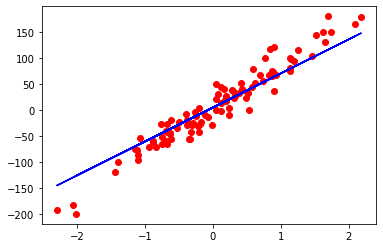

In [107]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


# 0) prepare data

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0],1)

n_samples, n_features = X.shape

# 1) model

input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) loss and optimizer 

learning_rate = 0.01
criterion = nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
n_epoch = 100

for epoch in range(n_epoch):
#     prediction = forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
#     backward pass
    loss.backward() #dl/dw
    
#     update weights
    optimizer.step()
    optimizer.zero_grad()
        
    
    if epoch % 10 == 0:
        [w, b]=model.parameters()
        print(f"epoch: {epoch+1}, loss = {loss.item():.4f}")
        
# 4) plot
predicted = model(X).detach().numpy() #Remove the gradients from the results of the prediction, and turn the results to numpy.array 
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()






# Logistic  Regression

Logistic Regression is normallly used to resolve the classification problems

In [62]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

# 0) prepare data

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

# Scale

sc = StandardScaler() # this will make your data's mean equals zero.
X_train = sc.fit_transform(X_train)# fit means '擬合'
X_test = sc.transform(X_test)      # the reason why here do not need fit is because this is test data, 
                                   # so we don't want the model to coordinate with test data, or the model will be useless. 
    
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)


# 1) model
#    f = wx + b, sigmoid at the end 

class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__() #繼承了LogisticRegression的父級,也就是nn.Module的__init__()
#       define layers
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):   
        y_predicted = torch.sigmoid(self.linear(x)) #the reason why we need sigmoid is because y(logit(Oods)) may smaller than 0. 
        return y_predicted
    
model =  LogisticRegression(n_features)       

# 2) loss and optimizer 

learning_rate = 0.01
criterion = nn.BCELoss()  # binary cross-entropy loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) training loop
n_epoch = 300

for epoch in range(n_epoch):
#     prediction = forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
#     backward pass
    loss.backward() #dl/dw
    
#     update weights
    optimizer.step()
    optimizer.zero_grad()
        
    
    if epoch % 10 == 0:
        [w, b]=model.parameters()
        print(f"epoch: {epoch+1}, loss = {loss.item():.4f}")
        
with torch.no_grad(): # without this code y_predicted.round() will still compute the gradient and track it.
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0]) #compare each item is equaled or not,
    
print(f'accuracy = {acc:.4f}')

        
        




569 30
epoch: 1, loss = 0.6998
epoch: 11, loss = 0.5509
epoch: 21, loss = 0.4631
epoch: 31, loss = 0.4057
epoch: 41, loss = 0.3649
epoch: 51, loss = 0.3343
epoch: 61, loss = 0.3102
epoch: 71, loss = 0.2907
epoch: 81, loss = 0.2744
epoch: 91, loss = 0.2606
epoch: 101, loss = 0.2488
epoch: 111, loss = 0.2384
epoch: 121, loss = 0.2292
epoch: 131, loss = 0.2210
epoch: 141, loss = 0.2137
epoch: 151, loss = 0.2070
epoch: 161, loss = 0.2009
epoch: 171, loss = 0.1954
epoch: 181, loss = 0.1903
epoch: 191, loss = 0.1855
epoch: 201, loss = 0.1812
epoch: 211, loss = 0.1771
epoch: 221, loss = 0.1733
epoch: 231, loss = 0.1697
epoch: 241, loss = 0.1663
epoch: 251, loss = 0.1632
epoch: 261, loss = 0.1602
epoch: 271, loss = 0.1574
epoch: 281, loss = 0.1547
epoch: 291, loss = 0.1522
accuracy = 0.9211


![jupyter](./images/logistic_regression.jpg)

![jupyter](./images/sigmoid.jpg)

# Dataset and DataLoader - Batch Training

In [20]:
import torch 
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [21]:
class WineDataset(Dataset):
    def __init__(self):
#         data loading
        xy=np.loadtxt('./data/wine.csv', delimiter=",",dtype=np.float32,skiprows=1)
        self.x = torch.from_numpy(xy[: , 1:])
        self.y = torch.from_numpy(xy[: , [0]])
        self.n_samples = xy.shape[0]
        
    def __getitem__(self,index):
# dataset[0]
        return self.x[index], self.y[index]

    def __len__(self):
# len(dataset)
        return self.n_samples 


dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(features, labels)




tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


In [25]:
class WineDataset(Dataset):

    def __init__(self):
#         data loading
        xy=np.loadtxt('./data/wine.csv', delimiter=",",dtype=np.float32,skiprows=1)
        self.x = torch.from_numpy(xy[: , 1:])
        self.y = torch.from_numpy(xy[: , [0]])
        self.n_samples = xy.shape[0]
        
    def __getitem__(self,index):
# dataset[0]
        return self.x[index], self.y[index]

    def __len__(self):
# len(dataset)
        return self.n_samples 


    dataset = WineDataset()
    dataloader = DataLoader(dataset = dataset, batch_size = 4, shuffle = True, num_workers = 0)
    # batch_size 是分成幾批&每批幾個 shuffle = True 是指隨機分配 num_workers 是指有多少workers來處理batches

    dataiter = iter(dataloader) # 生成一個迭代物件
    data = dataiter.next() # next()必須搭配 iter()
    features, labels = data
    print(features, labels)



# training loop
    num_epochs = 2 # 應該要是num_workers的數量, 但num_workers在windows不等於0跑不動
    total_samples = len(dataset)
    n_iteration = math.ceil(total_samples/4)

    print(total_samples, n_iteration)
    
    for epoch in range(num_epochs):
        for i, (inputs, labels) in enumerate(dataloader): # enumerate()可列出一个為索引序列及元素的組合
#             forward, backward, update
            if (i+1)%5 == 0:
                print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iteration}, inputs {inputs.shape}, labels: {labels}")

    print(len(dataloader))
    print(len(dataset))

tensor([[1.1660e+01, 1.8800e+00, 1.9200e+00, 1.6000e+01, 9.7000e+01, 1.6100e+00,
         1.5700e+00, 3.4000e-01, 1.1500e+00, 3.8000e+00, 1.2300e+00, 2.1400e+00,
         4.2800e+02],
        [1.2080e+01, 1.3900e+00, 2.5000e+00, 2.2500e+01, 8.4000e+01, 2.5600e+00,
         2.2900e+00, 4.3000e-01, 1.0400e+00, 2.9000e+00, 9.3000e-01, 3.1900e+00,
         3.8500e+02],
        [1.3870e+01, 1.9000e+00, 2.8000e+00, 1.9400e+01, 1.0700e+02, 2.9500e+00,
         2.9700e+00, 3.7000e-01, 1.7600e+00, 4.5000e+00, 1.2500e+00, 3.4000e+00,
         9.1500e+02],
        [1.4060e+01, 1.6300e+00, 2.2800e+00, 1.6000e+01, 1.2600e+02, 3.0000e+00,
         3.1700e+00, 2.4000e-01, 2.1000e+00, 5.6500e+00, 1.0900e+00, 3.7100e+00,
         7.8000e+02]]) tensor([[2.],
        [2.],
        [1.],
        [1.]])
178 45
epoch 1/2, step 5/45, inputs torch.Size([4, 13]), labels: tensor([[2.],
        [3.],
        [1.],
        [3.]])
epoch 1/2, step 10/45, inputs torch.Size([4, 13]), labels: tensor([[3.],
        [3.

# Dataset Transforms

Convert data from numpy, images to tensors.

In [50]:
import torch 
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [61]:
class WineDataset(Dataset):

    def __init__(self, transform = None):
#         data loading
        xy=np.loadtxt('./data/wine.csv', delimiter=",",dtype=np.float32,skiprows=1)
        self.x = xy[: , 1:]
        self.y = xy[: , [0]]
        self.n_samples = xy.shape[0]
        self.transform = transform
        
    def __getitem__(self,index):
# dataset[0]
        sample = self.x[index], self.y[index]
    
        if self.transform:
            sample = self.transform(sample)
        
        return sample
 
    def __len__(self):
# len(dataset)
        return self.n_samples 

class ToTensor: 
    def __call__(self, sample): 
        #let ToTensor become a callable Object
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)
    
class Multransform:
    def __init__(self, factor):
        self.factor = factor
          
    def __call__(self, sample): 
        #let ToTensor become a callable Object
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets
    


dataset = WineDataset(transform = None)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features),type(labels))

composed = torchvision.transforms.Compose([ToTensor(), Multransform(2)])
dataset = WineDataset(transform = composed)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features),type(labels))


[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


# Softmax and Cross Entropy

Softmax activation let the data output from actual value to be probabilities.
Notice !!! It can only be used as output layer


![jupyter](./images/softmax.png)

![jupyter](./images/softmax_layer.png)

In [1]:
import torch 
import torch.nn as nn
import numpy as np


In [4]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis = 0)

x = np.array([2.0, 1.0, 0.1])
output = softmax(x)
print('softmax numpy:', output)

x = torch.tensor([2.0, 1.0, 0.1])
output = torch.softmax(x, dim=0)
print('softmax torch', output)



softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch tensor([0.6590, 0.2424, 0.0986])


![jupyter](./images/cross_entropy.png)

In [7]:
import torch 
import torch.nn as nn
import numpy as np

def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])

# y must be one-hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]

Y =  np.array([1, 0, 0])

# y_pred has probabilities
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f"loss1 numpy: {l1:.3f}")
print(f"loss2 numpy: {l2:.3f}")





loss1 numpy: 0.357
loss2 numpy: 2.303


In [59]:
import torch 
import torch.nn as nn
import numpy as np

# CrossEntropyLoss in PyTorch (applies Softmax)
# nn.LogSoftmax + nn.NLLLoss
# NLLLoss = negative log likelihood loss
loss = nn.CrossEntropyLoss()


Y = torch.tensor([2, 0, 1]) #  n_samples == 3
#here maens that [the third value in 1st class, first value in 2nd class, second value in 3rd class] has the maximum

# n_samples*n_classes = 3*3
Y_pred_good = torch.tensor([[5.0, 1.0, 9.0], [5.0, 1.0, 0.25], [0.0, 7.0, 3.4]]) 
Y_pred_bad = torch.tensor([[0.5, 3.0, 1.0], [5.0, 1.0, 9.0], [5.0, 1.0, 1.2]])



l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())

_, prediction1 = torch.max(Y_pred_good, 1)
_, prediction2 = torch.max(Y_pred_bad, 1)
prediction = torch.max(Y_pred_bad, 1)

print(prediction1)
print(prediction2)
print(prediction)



0.02431126870214939
3.4183647632598877
tensor([2, 0, 1])
tensor([1, 2, 0])
torch.return_types.max(
values=tensor([3., 9., 5.]),
indices=tensor([1, 2, 0]))


![jupyter](./images/nn.CrossEntropyLoss.png)

You can check https://blog.csdn.net/silver1225/article/details/88914652 to deeply understand what is NLLLoss

You can check https://zhuanlan.zhihu.com/p/35709485 to learn more about CrossEntropyLoss

In [ ]:
import torch 
import torch.nn as nn

# Binary problem
# option1
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
#         no softmax() at the end
#       we must use sigmoid at the end, because we need to restrict our output between 0 & 1
        y_pred = torch.sigmoid(out)
        return y_pred

# option2
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out = torch.ReLu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return y_pred
        
model = NeuralNet2(input_size = 28*28, hidden_size = 5)
criterion = nn.BECLoss() #Binary Cross Entropy


In [2]:
import torch 
import torch.nn as nn

# multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
#         no softmax() at the end
        return out

model = NeuralNet2(input_size = 28*28, hidden_size = 5, num_classes = 3)
criterion = nn.CrossEntropyLoss() #applies softmax & NLLLoss

# Feed-Forward Neural Network (Using MNIST)

torch.Size([100, 1, 28, 28]) torch.Size([100])


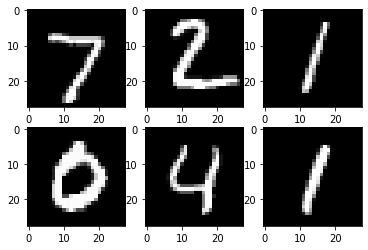

Epoch [1/2], Step [100/600], Loss: 0.3665
Epoch [1/2], Step [200/600], Loss: 0.3435
Epoch [1/2], Step [300/600], Loss: 0.1954
Epoch [1/2], Step [400/600], Loss: 0.2261
Epoch [1/2], Step [500/600], Loss: 0.1572
Epoch [1/2], Step [600/600], Loss: 0.1264
Epoch [2/2], Step [100/600], Loss: 0.1001
Epoch [2/2], Step [200/600], Loss: 0.0990
Epoch [2/2], Step [300/600], Loss: 0.1043
Epoch [2/2], Step [400/600], Loss: 0.0380
Epoch [2/2], Step [500/600], Loss: 0.1067
Epoch [2/2], Step [600/600], Loss: 0.0798
Accuracy of the network on the 10000 test images: 96.55 %


In [34]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape )

for i in range(6):
    plt.subplot(2,3,i+1) # subplot(nrows, ncols, index) index decide where the picture should be place.
    plt.imshow(example_data[i][0], cmap='gray') #samples[i][0], [0] means the first channel
plt.show()
# 100 is the quantity of the samples, 1 means one channel(because these are black and white images), 28,28 means 28*28  


# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) #nn.Linear(size of input, size of output )
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss() #applies softmax & NLLLoss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1) #get the max of the outputs and along the dimension one
        n_samples += labels.shape[0]
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')